# Computational Fluid Dynamics (CFD) work samples

### Jennifer Jones 
<a href="mailto:jennifer.jones@cal.berkeley.edu">jennifer.jones@cal.berkeley.edu</a>


## Background

The work shown here was performed using the CFD package called Fire Dynamics Simulator (FDS). FDS is an open source, free CFD package built and maintained by the National Institute of Standards and Technology (NIST). FDS, available [here](http://firemodels.github.io/fds-smv/) is similar to the [capabilities](http://www.ansys.com/staticassets/ANSYS/staticassets/resourcelibrary/brochure/ansys-capabilities-16.0.pdf) of commercial CFD codes such as [ANSYS Fluent](http://www.ansys.com/Products/Simulation+Technology/Fluid+Dynamics). 

FDS has capabilities for modeling fluid flow, heat transfer, pyrolysis, and combusion. It is best suited for simulating physical systems with simple geometries, since the physical model used in the simulations has to conform to an underlying rectilinear grid. For most of the work I did in FDS, I was focusing on transport phenomena and the physics of the underlying problem, rather than complex geometries. 

For the design of any sort of guidevanes, blades, or devices such as turbines, ANSYS Fluent would likely be a better match for handling these more complicated geometries.

For more complicated geometries, I would use CAD software such as SolidWorks for building or modifying the solid models, and then import the solid model into a CFD program.

## Work sample 1

The **objective** was to model the fluid flow, heat transfer, and combustion reactions inside a combustion chamber, and to look at the effect of injected turbulent air inside a combustion chamber of a household cookstove on the emissions of carbon monoxide and soot.

Included below are the following items:
- A code sample
- Summary statistics of numerical predictions of quantitative values such as velocity and the volume fraction of carbon monoxide emissions exiting the combustion chamber
- A time-series plot of the numerical values from a simulated carbon monoxide sensor defined in the CFD model
- 2-D images of the flow field through the combustion chamber, in a vertical plane, from the simulations

I used Fire Dynamics Simulator (FDS) as the CFD package. The summary statistics and time-series plots were performed using Python.

### Code sample

Whereas Fluent and other commercial CFD packages often include a graphical user interface (GUI) to make using the program more user-friendly, for FDS the user writes an input text file that is executed via the command line.

```
ig6.fds

&HEAD CHID='ig6', TITLE='Inside Stove; FDS version 6.0.0' /
&DUMP RENDER_FILE='ig6' /
&MISC DNS=.TRUE. / 
&TIME T_END=480. /

# MESH
&MESH IJK=240,1,240, XB=0.09,0.21,0.12,0.1205,0.03,0.15 / grid 0.5 mm 
&VENT MB='ZMAX', SURF_ID='OPEN', RGB=135,206,235, OUTLINE=.TRUE. / 

# REACTIONS
# C2H6O + 1.885 (O2 + 3.76 N2) -> 1.77 CO + 3 H2O + .23 C + 7.0876 N2
# CO + 1/2 O2 -> CO2, 	CO consumption (oxidation), exothermic rxn
# CO2 -> CO + 1/2 O2, 	CO production, endothermic rxn (reverse reaction)

# Reaction rates from Westbrook & Dryer, 1981, Units: cm s mol kcal K
# Ethanol Fuel:  k = 3.6e12*exp(-30/(RT))[C2H6O]^0.15[O2]^1.6
# CO Oxidation:  k = 4e14*exp(-40/(RT))[CO]^1[H2O(g)]^0.5[O2]^0.25
# CO Production: k = 5e8*exp(-40/(RT))[CO2]^1

&SPEC ID = 'NITROGEN' /
&SPEC ID = 'OXYGEN' /
&SPEC ID = 'WATER VAPOR' /
&SPEC ID = 'ETHANOL' /
&SPEC ID = 'CARBON MONOXIDE' /
&SPEC ID = 'CARBON DIOXIDE' /
&SPEC ID = 'SOOT', AEROSOL=.TRUE. /
&SPEC ID = 'AIR', SPEC_ID ='NITROGEN','OXYGEN', VOLUME_FRACTION = 3.76,1., 
            BACKGROUND = .TRUE. /

&REAC ID = 'Ethanol Fuel', FUEL='ETHANOL', 
	SPEC_ID_NU='ETHANOL','AIR','CARBON MONOXIDE','WATER VAPOR','SOOT','NITROGEN',
	NU=-1,-1.885,1.77,3,0.23,7.0876, CRITICAL_FLAME_TEMPERATURE = 425. / 
&REAC ID = 'CO Oxidation', FUEL='CARBON MONOXIDE', A=4e14, E=167360, 
	SPEC_ID_NU='CARBON MONOXIDE','OXYGEN','CARBON DIOXIDE', NU=-1,-0.5,1,
	SPEC_ID_N_S='CARBON MONOXIDE','WATER VAPOR','OXYGEN', N_S=1,0.5,0.25 / E in J/mol
&REAC ID = 'CO Production', FUEL='CARBON DIOXIDE', A=5e8, E=167360, 
	SPEC_ID_NU='CARBON DIOXIDE','CARBON MONOXIDE','OXYGEN', NU=-1,1,0.5,
	SPEC_ID_N_S='CARBON DIOXIDE', N_S=1 /

# MATERIAL PROPERTIES
&MATL ID='steel', 
      CONDUCTIVITY=54.0, DENSITY=7833., EMISSIVITY=0.9, SPECIFIC_HEAT=0.465 /
&SURF ID='fuel', MASS_FLUX=0.012, SPEC_ID='ETHANOL', RGB=255,69,0 / mdot" in kg/m^2/s
&SURF ID='wall', MATL_ID='steel', THICKNESS=0.001, BACKING='EXPOSED' /
&SURF ID='Igniter', COLOR='RED', TMP_FRONT=1500., RAMP_T='T_igniter' / 

&RAMP ID='T_igniter', T=0.0, F=0.0 /
&RAMP ID='T_igniter', T=1.0, F=1.0 /
&RAMP ID='T_igniter', T=2.5, F=1.0 /
&RAMP ID='T_igniter', T=3.0, F=0.0 /

# IGNITER AND FUEL
&DEVC XYZ=0.155,0.12,0.09, ID='Ignition timer', QUANTITY='TIME', SETPOINT=3.0, 
	  INITIAL_STATE=.TRUE./ Remove OBST after 3 sec when starting with it ON 
&OBST XB=0.1500,0.1520,0.12,0.1205,0.0895,0.0905, SURF_ID='Igniter', 
      DEVC_ID='Ignition timer', BNDF_OBST=.FALSE. /
&OBST XB=0.14,0.16,0.12,0.1205,0.055,0.0555, SURF_IDS='fuel','INERT','INERT', 
      BNDF_OBST=.FALSE. / As = 0.0004 m^2, SURF_IDS=top, sides, bottom
 
# AIR INLET THROUGH BOTTOM
&SURF ID='vent air flow', VEL=-0.15, MASS_FRACTION=1.0, SPEC_ID='AIR' / m/s
	  negative means into the domain
&OBST XB=0.09,0.21,0.12,0.1205,0.03,0.0305, SURF_ID='wall' / bottom
&VENT XB=0.09,0.21,0.12,0.1205,0.0305,0.0305, SURF_ID='vent air flow', 
      RGB=135,206,235, OUTLINE=.TRUE. /

# OUTPUT
&SLCF PBY = 0.12, QUANTITY = 'TEMPERATURE' /
&SLCF PBY = 0.12, QUANTITY = 'VELOCITY', VECTOR=.TRUE. /
&SLCF PBY = 0.12, QUANTITY = 'VOLUME FRACTION', SPEC_ID='ETHANOL' /
&SLCF PBY = 0.12, QUANTITY = 'VOLUME FRACTION', SPEC_ID='CARBON MONOXIDE' /
&SLCF PBY = 0.12, QUANTITY = 'AEROSOL VOLUME FRACTION', SPEC_ID='SOOT' / 

&DEVC ID='v_top', XB=0.09,0.21,0.12,0.1205,0.145,0.150, QUANTITY='VELOCITY', 
      STATISTICS='MEAN' /	
&DEVC ID='Xco_top', XB=0.09,0.21,0.12,0.1205,0.145,0.150, 
      QUANTITY='VOLUME FRACTION', SPEC_ID='CARBON MONOXIDE', STATISTICS='MEAN' /
&DEVC ID='Xs_top', XB=0.09,0.21,0.12,0.1205,0.145,0.150, 
      QUANTITY='AEROSOL VOLUME FRACTION', SPEC_ID='SOOT', STATISTICS='MEAN' /

&TAIL /
```

### Summary statistics and plot of output from CFD simulation

The numerical values here are from simulated sensors defined in the input file of the CFD model.

In [1]:
%pylab inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


63
Average exiting velocity: 0.2 m/s
Average exiting carbon monoxide mole fraction: 0.0033 mol/mol
Average heat release rate: 1.79 W
Average burn rate: 0.0072 g/min


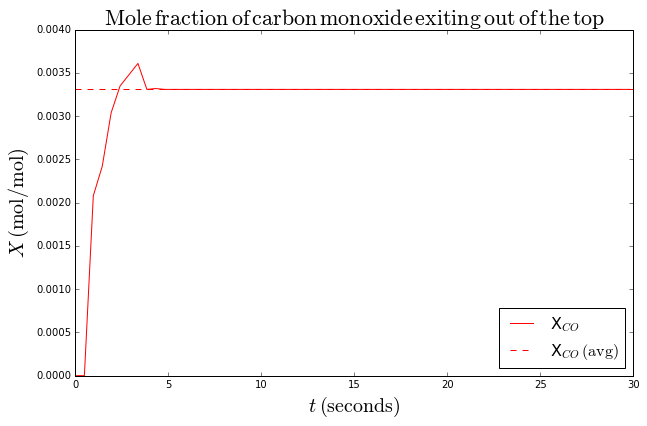

In [2]:
# Import CSV output file from the FDS simulation
fds = pd.read_csv('images/ig6_devc.csv', skiprows = 1) 
fdsdf = pd.DataFrame(data=fds)
fdsdf.describe() # units in s, degC, m/s, mol/mol, kW, kg/s
hrr = fdsdf.HRR.tail(30).mean()*1000 # convert kW to Watts
burn_rate = fdsdf.BURN_RATE.tail(30).mean()*1000*60 # convert kg to grams, seconds to minutes

print(len(fdsdf.Xco_top))
print('Average exiting velocity: %2.1f m/s' % fdsdf.v_top.tail(30).mean())
print('Average exiting carbon monoxide mole fraction: %2.4f mol/mol' % fdsdf.Xco_top.tail(30).mean())
print('Average heat release rate: %2.2f W' % hrr)
print('Average burn rate: %2.4f g/min' % burn_rate)

# Plot the output
f, ax = plt.subplots()
f.set_figheight(6.2)
f.set_figwidth(10.0)
sz_axes   = 16
sz_labels = 20
sz_title  = 22
plt.rc('xtick', labelsize = sz_axes); plt.rc('ytick', labelsize = sz_axes)

x  = fdsdf.Time
y0 = fdsdf.v_top
y1 = fdsdf.Xco_top
y2 = fdsdf.Xs_top

ax.plot(x, y1, 'r-', label = 'X$_{CO}$', linewidth = 1)
ax.axhline(y = y1.tail(30).mean(), linestyle = '--', color = 'r', label = 'X$_{CO} \, \mathrm{(avg)}$', linewidth = 1)
# ax.plot(x, y2, 'ko-', label = 'X$_{s}$', linewidth = 2)
# ax.plot(x, y0, 'b-', label = 'vel [m/s]', linewidth = 1)

ax.legend(loc = 0, fontsize = sz_axes)
ax.set_xlabel('$t \: \mathrm{(seconds)}$', fontsize = sz_labels)
ax.set_ylabel('$X \: (\mathrm{mol/mol})$', fontsize = sz_labels)

ax.set_title('$\mathrm{Mole \, fraction \, of \, carbon \, monoxide \, exiting \, out \, of \, the \, top}$', fontsize = sz_title)

show()

### Visualization of the simulated flow field along a vertical plane

Air flow enters from the bottom and exits at the top. The fuel is injected at the surface represented by the white line in the bottom quarter of the domain.

The first image is the velocity and the second image is the mole fraction of carbon monoxide.

<img src='images/ig6_velocity.png'>
<img src='images/ig6_xCO.png'>

### Modification

The mixing conditions within the combustion chamber need to be improved in order to reduce the emissions of carbon monoxide. 

### Code sample: Added a pipe and injected air into the combustion chamber

The CFD code and input file capture turbulence and finite rate chemical kinetics, including the reactions for both the production and oxidation of carbon monoxide. So even though the geometry is simple, the simulation can predict the reduction of CO due to increased mixing.

Included additional code:

```
ig6_pipe2a.fds
...
&SPEC ID = 'PIPE AIR', SPEC_ID ='NITROGEN','OXYGEN', VOLUME_FRACTION = 3.76,1. /

&MATL ID='steel', 
      CONDUCTIVITY=54.0, DENSITY=7833., EMISSIVITY=0.9, SPECIFIC_HEAT=0.465 /
&SURF ID='pipe air flow', MASS_FLUX=7.5, SPEC_ID='PIPE AIR', RGB=0,0,128 / 
      mdot" in kg/m^2/s, for Re = 4000
&SURF ID='pipe', MATL_ID='steel', THICKNESS=0.0010, RGB=128,128,128, 
      BACKING='EXPOSED' /

&OBST XB=0.20,0.22,0.12,0.1205,0.09,0.10, SURF_ID='pipe' / D = 1.0cm
&VENT XB=0.20,0.20,0.12,0.1205,0.09,0.10, SURF_ID='pipe air flow', COLOR='BLUE' /
...
&TAIL /
```

### Visualization of the simulated flow field along a vertical plane

This simulation is the same as before except air was injected through a pipe into the combustion chamber.

The first animated image series below shows the velocity in the combustion chamber, and the resulting added turbulence. The second shows the mole fraction of CO, and how, due to increased mixing of air with the combustion emissions, there is a reduction of the concentration of CO leaving the combustion chamber.

The third animated image shows the mole fraction of CO superimposed on the velocity profile. Much less emissions escape beyond the injected air flow and exit out of the top of the combustion chamber.

<img src='images/ig6_pipe2a_velocity_2fps.gif' width="90%" height="90%">
<img src='images/ig6_pipe2a_xCO_2fps.gif' width="90%" height="90%">
<img src='images/ig6_pipe2a_xCO_with_velocity_2fps.gif' width="90%" height="90%">

The animated gifs are displaying the series of images at a rate of 2 frames per second.

### Summary statistics and plot of output from CFD simulation

36
Average exiting velocity: 2.1 m/s
Average exiting carbon monoxide mole fraction: 0.0009 mol/mol
Average heat release rate: 1.79 W
Average burn rate: 0.0072 g/min


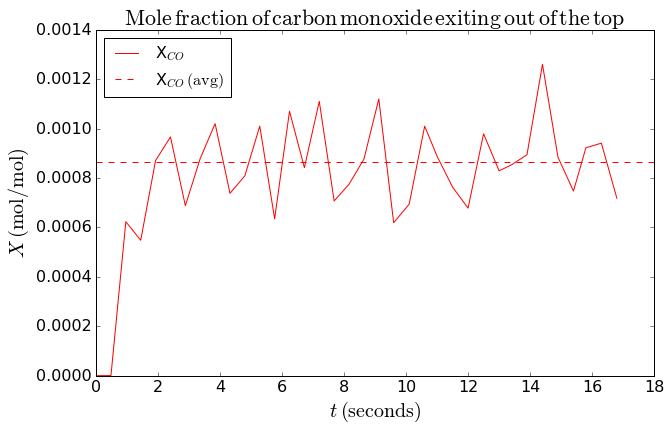

In [3]:
# Import CSV output file from the FDS simulation
fds = pd.read_csv('images/ig6_pipe2a_devc.csv', skiprows = 1) 
fdsdf = pd.DataFrame(data=fds)
fdsdf.describe() # units in s, degC, m/s, mol/mol
hrr = fdsdf.HRR.tail(30).mean()*1000 # convert kW to Watts
burn_rate = fdsdf.BURN_RATE.tail(30).mean()*1000*60 # convert kg to grams, seconds to minutes

print(len(fdsdf.Xco_top))
print('Average exiting velocity: %2.1f m/s' % fdsdf.v_top.tail(30).mean())
print('Average exiting carbon monoxide mole fraction: %2.4f mol/mol' % fdsdf.Xco_top.tail(30).mean())
print('Average heat release rate: %2.2f W' % hrr)
print('Average burn rate: %2.4f g/min' % burn_rate)

# Plot the output
f, ax = plt.subplots()
f.set_figheight(6.2)
f.set_figwidth(10.0)
sz_axes   = 16
sz_labels = 20
sz_title  = 22
plt.rc('xtick', labelsize = sz_axes); plt.rc('ytick', labelsize = sz_axes)

x  = fdsdf.Time
y0 = fdsdf.v_top
y1 = fdsdf.Xco_top
y2 = fdsdf.Xs_top

ax.plot(x, y1, 'r-', label = 'X$_{CO}$', linewidth = 1)
ax.axhline(y = y1.tail(30).mean(), linestyle = '--', color = 'r', label = 'X$_{CO} \, \mathrm{(avg)}$', linewidth = 1)
# ax.plot(x, y2, 'ko-', label = 'X$_{s}$', linewidth = 2)
# ax.plot(x, y0, 'b-', label = 'vel [m/s]', linewidth = 1)

ax.legend(loc = 0, fontsize = sz_axes)
ax.set_xlabel('$t \: \mathrm{(seconds)}$', fontsize = sz_labels)
ax.set_ylabel('$X \: (\mathrm{mol/mol})$', fontsize = sz_labels)

ax.set_title('$\mathrm{Mole \, fraction \, of \, carbon \, monoxide \, exiting \, out \, of \, the \, top}$', fontsize = sz_title)

show()

### Comparing the two cases

The added turbulent kinetic energy and air coming from the pipe reduces the exiting CO emissions (mole fraction) by an order of magnitude! Both cases maintain the same heat release rate (1.8 W) and fuel burn rate (0.007 g/min), so the reduction in emissions is due to turbulent mixing.

For the design process of a combustion chamber given specific design constraints, combustion chamber geometry, etc., and design goals, simulations can be performed to determine optimal parameters such as the the diameter of the pipe, the location (height) of the pipe, and the velocity of air exiting the pipe.

## Work sample 2

This project was largely a transport problem. The flow of air and combustion emissions throughout a room (or smaller chamber) was simulated to predict spatial concentrations of emissions for informing public health methodology related to exposure assessment and indoor air quality.

### Flow visualizations

This visualization shows velocity vectors for the flow field through an opening in a chamber. The plane shown is a vertical slice through the center of the 3-D chamber at the location of the combustion source. Notice the transient turbulent eddies forming as the buoyant-driven flow of CO, CO$_2$, and water vapor expands toward the chamber ceiling (the chamber outline is not shown in the animated image).

<img src='images/rv3_Ea_velocity-vector-slice-animated.gif' width="90%" height="90%">

Most of the results for this project were focused on plotting quantitative output from the CFD simulations (simulated sensors predicting quantities at point sources). Quantities such as concentrations of emissions of carbon monoxide were plotted and compared at different spatial locations within a room (or chamber), which varied and were heavily dependent on ventilation conditions.